<b>
Question- 5<br>


</b>

In [1]:
import pandas as pd
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt
import itertools  
from mlxtend.frequent_patterns import association_rules 

<h2>Question 6</h2>

In [2]:
dataset = [[ 'M', 'O', 'N', 'K', 'E', 'Y'],
           ['D', 'O', 'N', 'K', 'E', 'Y'],
           ['M', 'A', 'K', 'E'],
           ['M', 'U', 'C', 'K', 'Y'],
           ['C', 'O', 'O', 'K', 'I', 'E']]
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,A,C,D,E,I,K,M,N,O,U,Y
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [3]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.8,(E)
1,1.0,(K)
2,0.6,(M)
3,0.6,(O)
4,0.6,(Y)
5,0.8,"(E, K)"
6,0.6,"(E, O)"
7,0.6,"(K, M)"
8,0.6,"(K, O)"
9,0.6,"(K, Y)"


We got the same values as the above problem. We have considered min support =3 i.e random support =3/5=0.6

<h2>Question 7 <h2>

<h5>7 a)</h5>

In [4]:
data1=pd.read_csv('data/order_products__train_small.csv')
data2=pd.read_csv('data/orders_product__train_med.csv')
data3=pd.read_csv('data/products.csv')

In [5]:
res=pd.merge(data1,data3[['product_id','product_name']],on='product_id')
res1=pd.merge(data2,data3[['product_id','product_name']],on='product_id')

In [6]:
l=res['order_id'].value_counts()
l1=res1['order_id'].value_counts()

In [7]:
k=res['order_id'].value_counts().reset_index().rename(columns={'index': 'order_id','order_id':'count'})
k1=res1['order_id'].value_counts().reset_index().rename(columns={'index': 'order_id','order_id':'count1'})

In [8]:
k4=pd.merge(k,k1,on='order_id',how='outer')
k4['count'] = k4['count'].fillna(0)
k4['count1'] = k4['count1'].fillna(0)
k4['co']=k4['count']+k4['count1']    
k4.sort_values(by=['order_id'])

,order_id,count,count1,co
1000,1,8.0,8,16.0
961,36,8.0,8,16.0
880,38,9.0,9,18.0
1144,96,7.0,7,14.0
3,98,49.0,49,98.0
...,...,...,...,...
35415,1227622,0.0,5,5.0
32107,1227633,0.0,6,6.0
46250,1227666,0.0,1,1.0
42621,1227711,0.0,2,2.0


Text(0.5, 1.0, 'histogram showing the number of products per order')

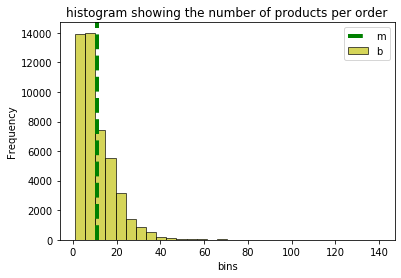

In [9]:
k4['co'].plot.hist( bins=30,color='y', edgecolor='k', alpha=0.65)
plt.axvline(k4['co'].mean(), color='g', linestyle='dashed', linewidth=4)
plt.legend("mb")
plt.xlabel('bins')
plt.title('histogram showing the number of products per order')

<h5>7 b)</h5>

In [10]:
rest=res.sort_values(by=['order_id'])

In [11]:
ke=rest['order_id'].value_counts().reset_index().rename(columns={'index': 'order_id','order_id':'count'})
ke=ke.sort_values(by=['order_id'])

In [12]:
u=rest['product_name'].tolist()
y=ke['count'].tolist()
lis1=[]
p=0
for i in y:
    lis1.append(u[p : p+i])
    p=p+i 
lis1    

[['Bulgarian Yogurt',
  'Organic 4% Milk Fat Whole Milk Cottage Cheese',
  'Organic Celery Hearts',
  'Organic Whole String Cheese',
  'Organic Hass Avocado',
  'Bag of Organic Bananas',
  'Lightly Smoked Sardines in Olive Oil',
  'Cucumber Kirby'],
 ['Super Greens Salad',
  'Cage Free Extra Large Grade AA Eggs',
  'Prosciutto, Americano',
  'Organic Garnet Sweet Potato (Yam)',
  'Asparagus',
  'Spring Water',
  'Grated Pecorino Romano Cheese',
  'Organic Half & Half'],
 ['Shelled Pistachios',
  'Organic Biologique Limes',
  'Organic Raw Unfiltered Apple Cider Vinegar',
  'Organic Baby Arugula',
  'Organic Hot House Tomato',
  'Green Peas',
  'Bunched Cilantro',
  'Flat Parsley, Bunch',
  'Fresh Dill'],
 ['Organic Pomegranate Kernels',
  'Organic Blueberries',
  'Organic Whole Strawberries',
  'Organic Raspberries',
  'Roasted Turkey',
  'Organic Grape Tomatoes',
  'Organic Cucumber'],
 ['Organic Yellow Onion',
  'Organic Italian Parsley Bunch',
  'Organic 2% Buttermilk',
  'Organic Fr

Text(0.5, 1.0, 'plot of top 15 most frequently purchased items')

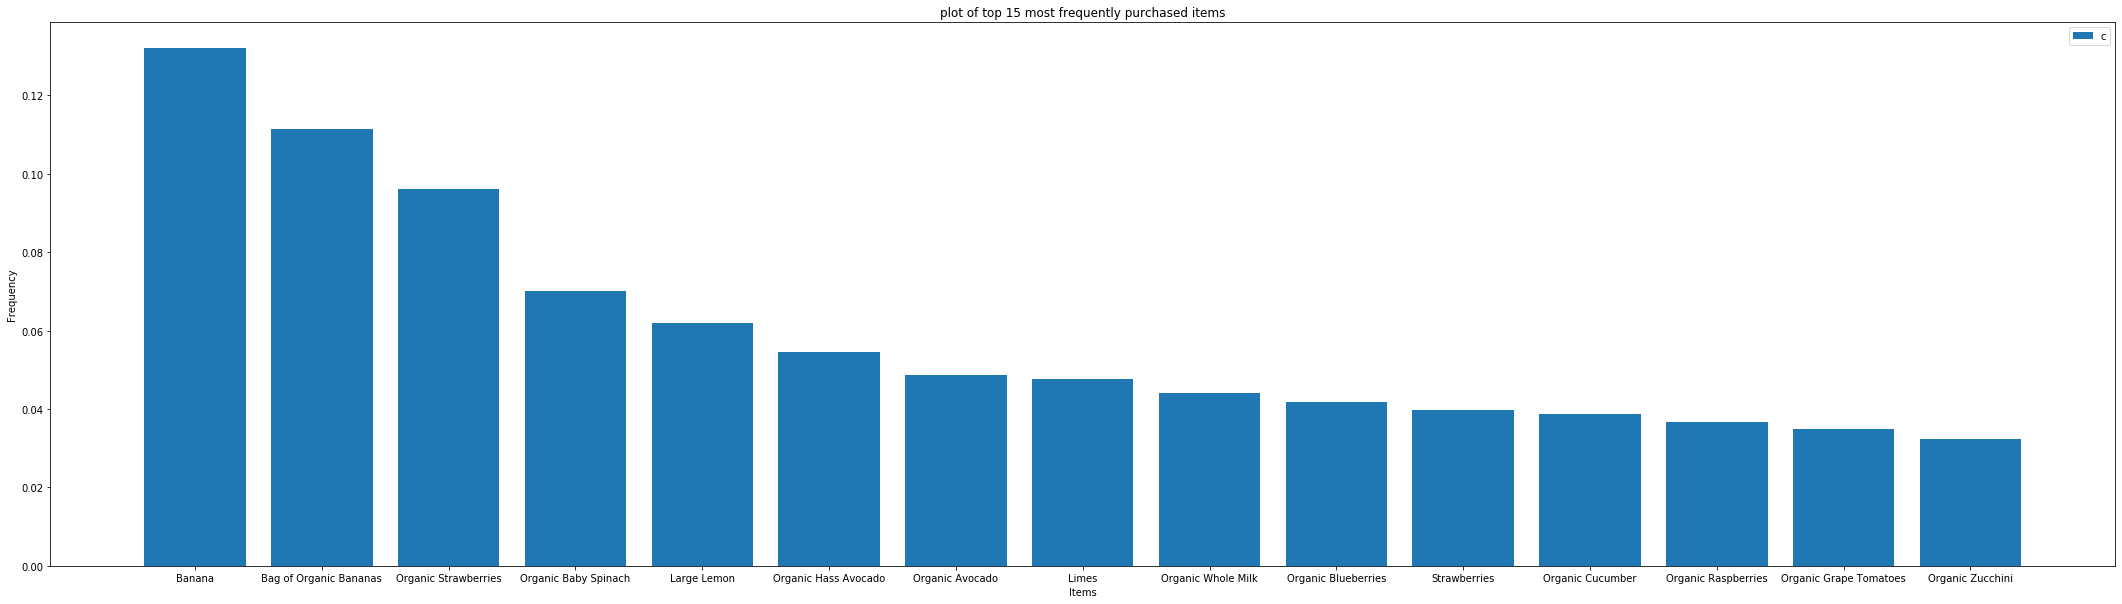

In [13]:
te = TransactionEncoder()
te_ary = te.fit(lis1).transform(lis1)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.003, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
date=frequent_itemsets[frequent_itemsets['length'] == 1]
ren=date.sort_values(by=['support'],ascending=False)
ren=ren.drop('length',axis=1)
ren1=ren[0:15]
y=ren1['itemsets'].tolist()
s=[list(x) for x in y]
chain = itertools.chain.from_iterable(s)
s1=list(chain)
x=ren1['support'].tolist()
plt.figure(figsize=(37,10))
plt.bar(s1,x)
plt.legend("counts")
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('plot of top 15 most frequently purchased items')

<h5> Question 7c </h5>

In [14]:
te = TransactionEncoder()
te_ary = te.fit(lis1).transform(lis1)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.003, use_colnames=True)
#association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules[(rules['confidence'] >= 0.5)]
rul=rules.sort_values(by='lift',ascending=False)
rul.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1155,"(Organic Avocado, Organic Red Onion)",(Limes),0.005302,0.047720,0.004242,0.800000,16.764444,0.003989,4.761400
1192,"(Organic Hass Avocado, Organic Garlic)",(Organic Yellow Onion),0.006363,0.031283,0.003181,0.500000,15.983051,0.002982,1.937434
1090,"(Organic Cilantro, Banana)",(Limes),0.004242,0.047720,0.003181,0.750000,15.716667,0.002979,3.809120
944,"(Asparagus, Limes)",(Large Lemon),0.004772,0.062036,0.004242,0.888889,14.328585,0.003946,8.441676
945,"(Asparagus, Large Lemon)",(Limes),0.006363,0.047720,0.004242,0.666667,13.970370,0.003938,2.856840
1149,"(Organic Avocado, Organic Cilantro)",(Limes),0.004772,0.047720,0.003181,0.666667,13.970370,0.002954,2.856840
1126,"(Large Lemon, Organic Red Onion)",(Limes),0.006363,0.047720,0.003712,0.583333,12.224074,0.003408,2.285472
1018,"(Bag of Organic Bananas, Organic Plain Greek W...",(Organic Hass Avocado),0.004772,0.054613,0.003181,0.666667,12.207120,0.002921,2.836161
1162,"(Limes, Organic Garnet Sweet Potato (Yam))",(Organic Baby Spinach),0.005302,0.069989,0.004242,0.800000,11.430303,0.003871,4.650053
1191,"(Organic Yellow Onion, Organic Garlic)",(Organic Hass Avocado),0.005302,0.054613,0.003181,0.600000,10.986408,0.002892,2.363468


<h5> Question 7d </h5>

In [15]:
te = TransactionEncoder()
te_ary = te.fit(lis1).transform(lis1)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.0025, use_colnames=True)
#association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules[(rules['confidence'] >= 0.5)]
rul=rules.sort_values(by='lift',ascending=False)
rul.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
603,(Non Fat Raspberry Yogurt),(Icelandic Style Skyr Blueberry Non-fat Yogurt),0.003712,0.006363,0.002651,0.714286,112.261905,0.002627,3.477731
424,(Blueberry Yoghurt),(Strawberry Rhubarb Yoghurt),0.005302,0.004772,0.002651,0.500000,104.777778,0.002626,1.990456
425,(Strawberry Rhubarb Yoghurt),(Blueberry Yoghurt),0.004772,0.005302,0.002651,0.555556,104.777778,0.002626,2.238070
1436,"(Apple Honeycrisp Organic, Organic Zucchini)",(Organic Raspberries),0.003712,0.036585,0.002651,0.714286,19.523810,0.002515,3.371951
1843,"(Organic Avocado, Organic Red Onion)",(Limes),0.005302,0.047720,0.004242,0.800000,16.764444,0.003989,4.761400
1758,"(Limes, Broccoli Crown)",(Large Lemon),0.002651,0.062036,0.002651,1.000000,16.119658,0.002487,inf
1988,"(Organic Hass Avocado, Organic Garlic)",(Organic Yellow Onion),0.006363,0.031283,0.003181,0.500000,15.983051,0.002982,1.937434
1700,"(Organic Cilantro, Banana)",(Limes),0.004242,0.047720,0.003181,0.750000,15.716667,0.002979,3.809120
1974,"(Organic Baby Spinach, Organic Yellow Onion)",(Organic Zucchini),0.005302,0.032344,0.002651,0.500000,15.459016,0.002480,1.935313
1428,"(Apple Honeycrisp Organic, Organic Hass Avocado)",(Organic Raspberries),0.004772,0.036585,0.002651,0.555556,15.185185,0.002477,2.167683


Text(0, 0.5, 'Confidence')

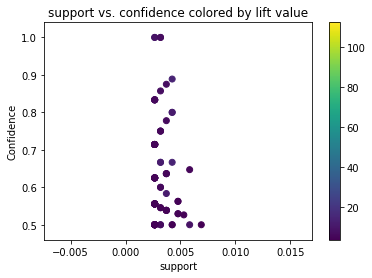

In [16]:
import matplotlib.cm as cm
import numpy as np
plt.scatter(rul['support'],rul['confidence'], c=rul['lift'])
plt.title('support vs. confidence colored by lift value')
plt.colorbar()
plt.xlabel('support')
plt.ylabel('Confidence')